In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
import pandas as pd
from PIL import Image

In [2]:
result = np.array( [[ 1.8443e+02,  2.5514e+02,  1.4774e+02,  2.5579e+01, -8.7395e-01,  9.9858e-01],
        [ 9.5368e+02,  6.4222e+02,  4.6675e+01,  1.4295e+01,  5.7650e-02,  9.5105e-01],
        [ 2.8700e+02,  6.3325e+02,  3.7478e+01,  1.3255e+01, -1.3657e+00,  8.3356e-01],
        [ 3.0577e+02,  7.5982e+01,  1.9110e+01,  5.2225e+00, -9.4854e-01,  7.8728e-01],
        [ 9.7576e+02,  6.4684e+02,  1.2341e+01,  4.0054e+00, -5.3146e-01,  4.4006e-01],
        [ 9.3477e+02,  6.3909e+02,  1.0019e+01,  4.9229e+00, -3.1685e-01,  8.9501e-02]] )

In [3]:
# rotation matrix matmul sample

sample_x = 3
sample_y = 2

theta = 30 * (np.pi*1/180) 
rotate_matrix =np.array( [
    [np.cos(theta),-np.sin(theta)],
    [np.sin(theta),np.cos(theta)]] )

bbox_ = np.array( [sample_x,sample_y])

print(bbox_)
print(np.dot(rotate_matrix  ,bbox_)) # n m x m a = na 


[3 2]
[1.59807621 3.23205081]


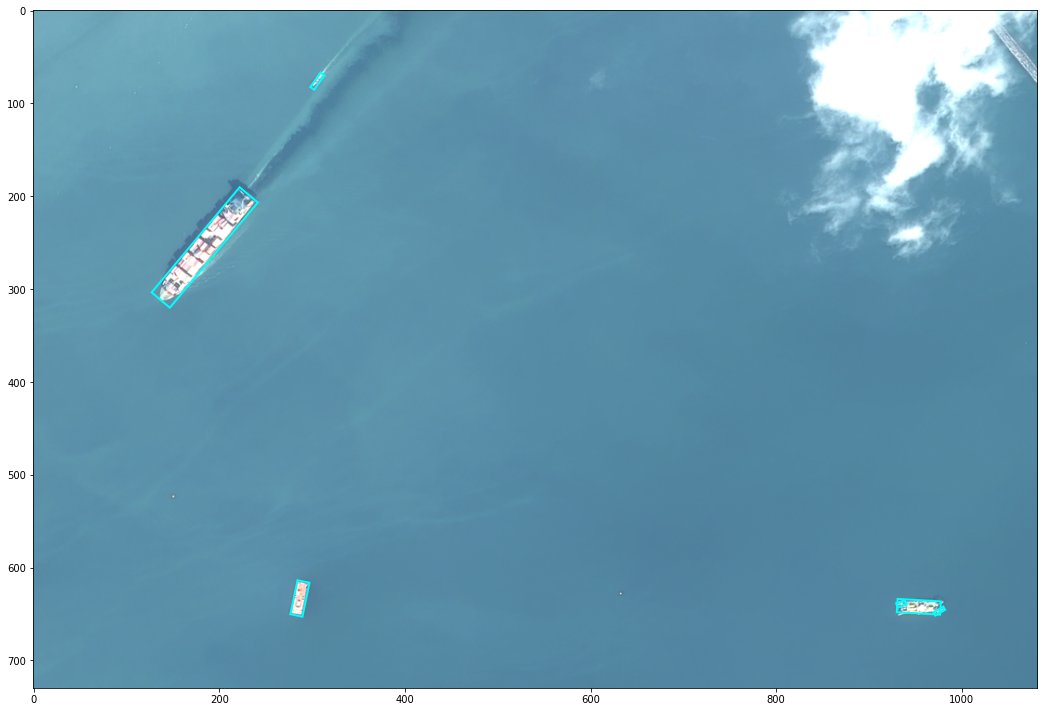

In [4]:
img_path = "/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/api_test_2.PNG"
img_ = Image.open(img_path)
plt.figure(figsize=(18,18))
plt.imshow(img_)

ax = plt.gca()


for box_ in result:
    x = box_[0]
    y = box_[1]
    width = box_[2]
    height = box_[3]
    angle_ = box_[4]

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 

    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=2, edgecolor="cyan", fill=False,
                                 rotation_point="center",
                                 angle=angle_*180/np.pi)
    
    ax.add_patch(path_obj)

plt.show()

In [5]:
# 위의 x,y 중심점 좌표를 미리 정리되어 있는 이미지 with 좌표계 정보를 이용해서 x,y => 좌표계 파이프라인 

In [6]:
!pip install gdal==1.7.0

  Using cached GDAL-1.7.0.tar.gz (359 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [30 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-38
      copying gdal.py -> build/lib.linux-x86_64-cpython-38
      copying ogr.py -> build/lib.linux-x86_64-cpython-38
      copying osr.py -> build/lib.linux-x86_64-cpython-38
      copying gdalconst.py -> build/lib.linux-x86_64-cpython-38
      copying gdalnumeric.py -> build/lib.linux-x86_64-cpython-38
      creating build/lib.linux-x86_64-cpython-38/osgeo
      copying osgeo/osr.py -> build/lib.linux-x86_64-cpython-38/osgeo
      copying osgeo/gdal_array.py -> build/lib.linux-x86_64-cpython-38/osgeo
      copying osgeo/gdalnumeric.py -> build/lib.linux-x86_64-cpython-38/osgeo
      copying osgeo/gdal.py -> build/lib.linux-x86

In [5]:
!pip install pyproject-toml

In [18]:
from PIL.TiffTags import TAGS

with Image.open("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif") as img:
    meta_dict = {TAGS[key] : img.tag[key] for key in img.tag.iterkeys()}

UnidentifiedImageError: cannot identify image file '/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif'

In [16]:
qq = Image.open("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif")

UnidentifiedImageError: cannot identify image file '/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif'

NameError: name 'qq' is not defined

In [7]:
from osgeo import gdal 
gdal.Open('/Users/ykko/Downloads/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif')
lx_utm,xres,xskew,uy_utm,yskew,yres=ds.GetGeoTransform()
print(lx_utm,uy_utm)

ModuleNotFoundError: No module named '_gdal'

In [13]:
import rasterio
with rasterio.open("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif") as map_layer:
    coords2pixels = map_layer.index(14352594,4170544) #input lon,lat
    
    #pixels2coords = map_layer.xy(-0.5,-0.5)  #input px, py
# 이게 미묘하게 0.5픽셀 정도 밀려 있는 거 같긴 해요.
# input lon,lat은 해당 TIF 파일의 좌표계에 맞춰서 넣어야 하는 것 같고요. 차중은 UTM zone 52N이라서 저런 이상한 숫자가 들어간 겁니당

In [14]:
coords2pixels

(-145032, 6929519)

In [5]:
# tif to png 
# 보완포인트 => RGB normalizing 해야지 눈알 안빠짐 

from PIL import Image
import matplotlib.patches as patches
import matplotlib as mpl
from glob import glob
import xml.etree.ElementTree as elemTree
import math 
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import exposure
import tifffile as tiff
import rasterio 



def convert(img, target_type_min, target_type_max, target_type):  # 16 bit to 0~1 (float32) / 16 bit to 0~255 (8bit uint)
    img_min = img.min()
    img_max = img.max()
    a = (target_type_max - target_type_min) / (img_max - img_min)
    b = target_type_max - a * img_max
    new_img = (a * img + b).astype(target_type)
    return new_img



File = f"/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/post_images/tif_data/C1_20221227015155_09806_00006119_L1G_RGB_ver2.1_eric.tif"


NIR_ = False
if NIR_ :
    SAT_DATA = rasterio.open(File)
    Band_Red, Band_Green, Band_Blue, Band_NIR = SAT_DATA.read()
    SAT_IMG = np.stack([Band_Red, Band_Green, Band_Blue, Band_NIR], axis=-1)
    processed_SAT_IMG = convert(SAT_IMG, 0, 1, np.float32)
    red = processed_SAT_IMG[:,:,0]
    green = processed_SAT_IMG[:,:,1]
    blue = processed_SAT_IMG[:,:,2]
    nir = processed_SAT_IMG[:,:,3]
    rgb = np.stack([red, green, blue], axis=-1)
else:
    SAT_DATA = rasterio.open(File)
    Band_Red, Band_Green, Band_Blue = SAT_DATA.read()
    SAT_IMG = np.stack([Band_Red, Band_Green, Band_Blue], axis=-1)
    processed_SAT_IMG = convert(SAT_IMG, 0, 1, np.float32)
    red = processed_SAT_IMG[:,:,0]
    green = processed_SAT_IMG[:,:,1]
    blue = processed_SAT_IMG[:,:,2]
    rgb = np.stack([red, green, blue], axis=-1)

def contrast_stretch_mb(img):  # 너무밝은 2% 너무어두운 2% 버리기
    img_temp = img
    for b in range(0,img_temp.shape[2]):
        p2, p98 = np.percentile(img_temp[:, :, b], (2, 98))
        img_scaled = exposure.rescale_intensity(img_temp, in_range=(p2, p98))
        img_temp[:, :, b] = img_scaled[:, :, b]
    return img_temp


rgb_contrast = contrast_stretch_mb(rgb.copy())


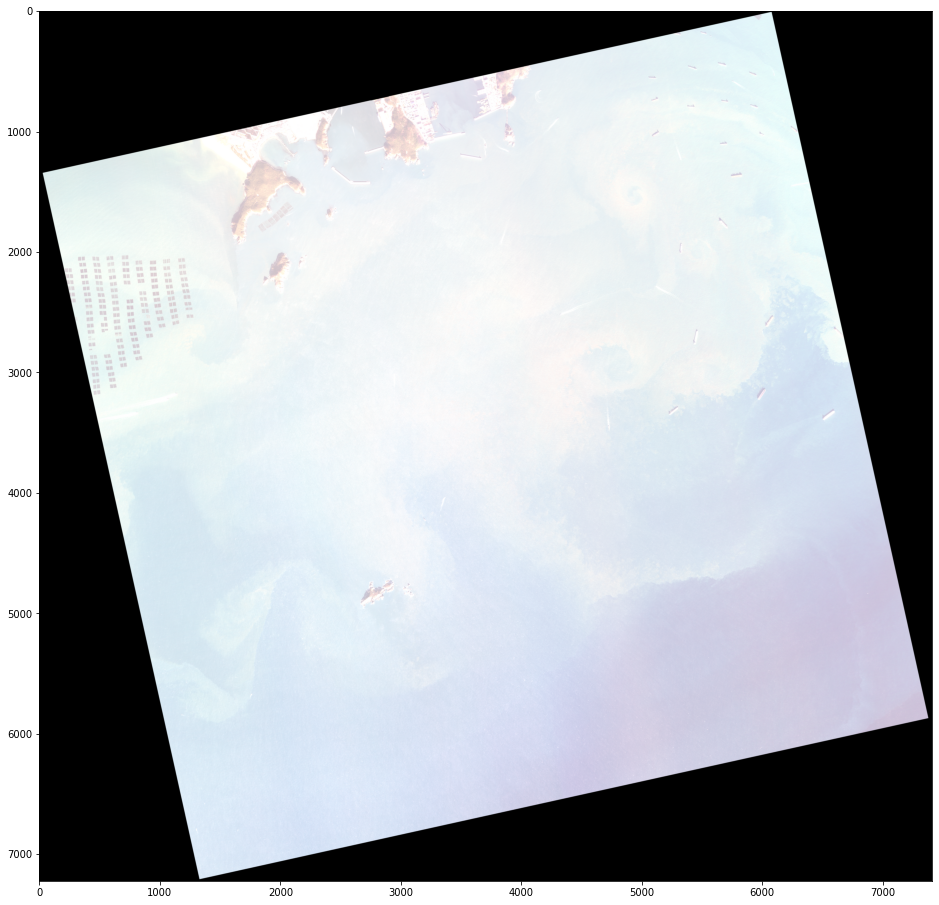

In [6]:
plt.figure(figsize=(16,16))
plt.imshow(rgb_contrast)